# Spike_phase

I used this notebook to create the spikeA.Spike_phase class.

In [1]:
%load_ext autoreload
%autoreload 2

from spikeA.Dat_file_reader import Dat_file_reader
from spikeA.Session import Kilosort_session
from spikeA.Theta import Theta
from spikeA.Session import *
from spikeA.Spike_train_loader import Spike_train_loader
from spikeA.Cell_group import Cell_group
from spikeA.Spike_phase import Spike_phase
import spikeA.spike_time


import numpy as np
import matplotlib.pyplot as plt

In [2]:
mouse="bt8564"
date="23072021"
name=f"{mouse}-{date}-0105"
path=f"/adata/electro/{mouse}/{name}/"

In [3]:
ses = Kilosort_session(name=name, path = path)
ses.load_parameters_from_files()

In [4]:
# create a theta object to do theta analysis
theta = Theta(session=ses)

In [5]:
theta.load_theta_epochs_and_cycles()

In [6]:
stl = Spike_train_loader()
stl.load_spike_train_kilosort(ses)
cg = Cell_group(stl)
print("Number of neurons: {}".format(len(cg.neuron_list)))

Number of neurons: 27


Get the phase of the spikes of one neuron.

(-1.7900673450984315, 0.4051871131717424)

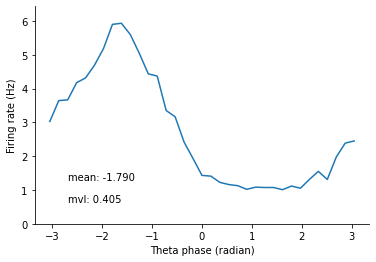

In [10]:
st = cg.neuron_list[5].spike_train
sph = Spike_phase(st,theta.cycles[0])
sph.spike_phase()
fig,axes = plt.subplots(nrows=1, ncols=1) # we use pyplot.subplots to get a figure and axes.
sph.plot_phase_histogram(axes)
sph.spike_phase_stats()

We can do it for all neurons in the Cell_group

In [11]:
sph_list = [] # get the spike phase for all neurons
for i, n in enumerate(cg.neuron_list):
    st = cg.neuron_list[i].spike_train
    sph = Spike_phase(st,theta.cycles[0])
    sph.spike_phase()
    sph_list.append(sph)

We can now plot all phase histograms

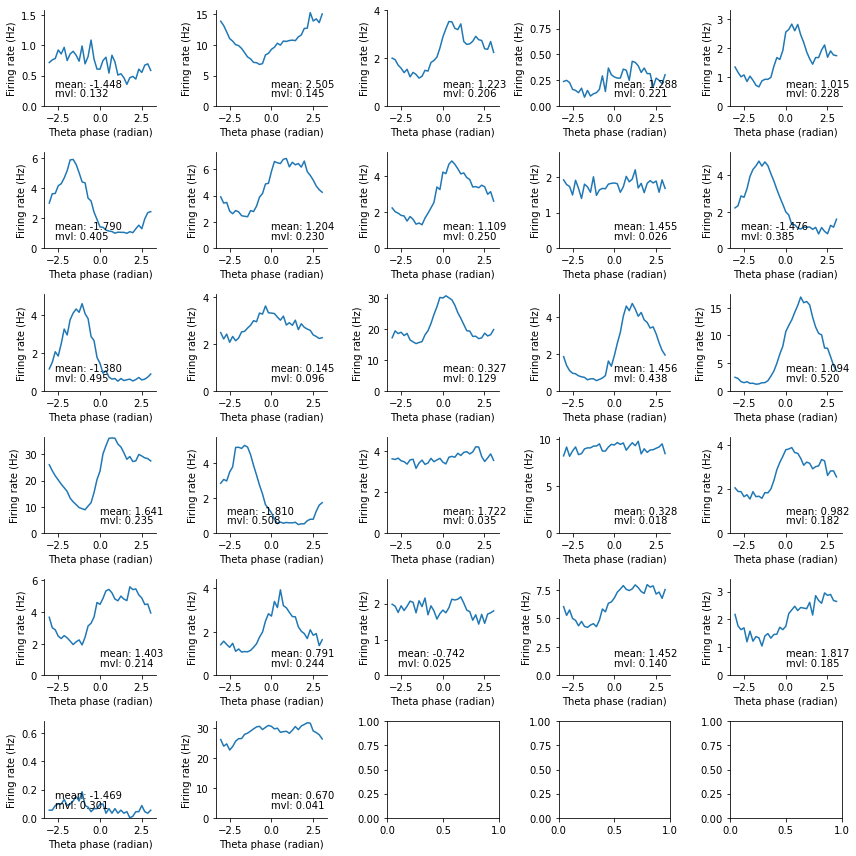

In [12]:
nCols = 5
fig,axes = plt.subplots(nrows=6, ncols=nCols,figsize=(6*2,6*2)) # we use pyplot.subplots to get a figure and axes.
for i, n in enumerate(cg.neuron_list):
    r = int(i/nCols)
    c = i%nCols
    sph = sph_list[i]
    ax = axes[r,c]
    sph.plot_phase_histogram(ax)
    
plt.tight_layout()